# Seattle Food Establishment Inspection
## Table of Contents
1. Questions to Answer
2. Import Libraries
3. API Connection
4. Import Data
5. Inspect Data
6. Data Cleaning
7. Exploratory Data Analysis
   - Splitting the data into most recent inspections
   

## Helpful Links
Food Safety Rating System: https://kingcounty.gov/en/legacy/depts/health/environmental-health/food-safety/inspection-system/food-safety-rating.aspx


### 1. Questions to Answer

1. What is the distribution of ratings in King County?
2. What restaurants have the highest violation points & frequency of violations?
3. Do smaller or larger establishments tend to have better ratings?
4. Which cities in King County have the best ratings?
5. How many businesses have closed due to poor inspections?
6. Can we do a keyword analysis based on restaurant name of what restaurants tend to have better/worse ratings?
7. What is the likelihood that if you have a bad rating right now that it will improve?

### 2. Import Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

### 3. API Connection

In [31]:
## FILL THIS IN LATER!!

### 4. Import Data via CSV

In [32]:
# import data from csv
inspections = pd.read_csv('Food_Establishment_Inspection_Data.csv', low_memory = False)

### 5. Inspect Data

In [33]:
# preview data
inspections.head()

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,PR0089260,DAJ5DTHLV,IVBTPZO0B,1.0
1,#807 TUTTA BELLA,#807 TUTTA BELLA,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAJ5DTHLV,IV5GOME67,1.0
2,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0
3,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0
4,#807 TUTTA BELLA,#807 TUTTA BELLA,01/13/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0


In [34]:
# preview info about the dataset
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258632 entries, 0 to 258631
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        258632 non-null  object 
 1   Program Identifier          258632 non-null  object 
 2   Inspection Date             258105 non-null  object 
 3   Description                 258632 non-null  object 
 4   Address                     258632 non-null  object 
 5   City                        258632 non-null  object 
 6   Zip Code                    258632 non-null  object 
 7   Phone                       187778 non-null  object 
 8   Longitude                   257796 non-null  float64
 9   Latitude                    257796 non-null  float64
 10  Inspection Business Name    258105 non-null  object 
 11  Inspection Type             258105 non-null  object 
 12  Inspection Score            258067 non-null  float64
 13  Inspection Res

#### Insight
There are ~258k records in this dataset. The following fields are less than this total:
- Inspection Date
- Phone
- Longitude
- Latitude
- Inspection Business Name
- Inspection Type
- Inspection Score
- Inspection Result
- Inspection Closed Business
- Violation Type
- Violation Description
- Inspection Serial Number
- Violation Record ID

### Next Steps
1. A couple of these are columns we can drop from the get go because we won't need them to do further analysis (phone, longtidue, latitude).
   
2. Some columns have duplicate information so we can drop these as well (Program Identifier and Inspection Business Name are duplicates of Name which has the most complete data).

3. Because there are new restaurants on this list, some places will not yet have a Grade. Additionally, those restaurants that have not had a violation will not have violation type/points/description.
   
4. Most likely we will want to grab the most recent inspection from this list so that may clear up some of the data gaps for old entries.

### 6. Data Cleaning

In [35]:
# drop unnecessary columns
drop_columns = ['Program Identifier', 'Phone', 'Longitude', 'Latitude', 'Inspection Business Name', 'Inspection Type']
inspections = inspections.drop(labels = drop_columns, axis = 1)

In [36]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258632 entries, 0 to 258631
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        258632 non-null  object 
 1   Inspection Date             258105 non-null  object 
 2   Description                 258632 non-null  object 
 3   Address                     258632 non-null  object 
 4   City                        258632 non-null  object 
 5   Zip Code                    258632 non-null  object 
 6   Inspection Score            258067 non-null  float64
 7   Inspection Result           258105 non-null  object 
 8   Inspection Closed Business  258105 non-null  object 
 9   Violation Type              144155 non-null  object 
 10  Violation Description       144155 non-null  object 
 11  Violation Points            258632 non-null  int64  
 12  Business_ID                 258632 non-null  object 
 13  Inspection_Ser

In [37]:
# Title Case & strip extra whitespaces from Name & City column
cols = ['Name', 'City']
inspections[cols] = inspections[cols].apply(lambda x: x.str.title())
inspections[cols] = inspections[cols].apply(lambda x: x.str.strip())

# fill missing numerical values with 0
# convert float to integer
for column in inspections.columns:
    if inspections[column].dtype == 'float' or inspections[column].dtype == 'int64':
        inspections[column] = inspections[column].fillna(0)
    elif inspections[column].dtype == 'float':
        inspections[column] = inspections[column].astype('int64')

# preview data
inspections.head()

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 Tutta Bella,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,PR0089260,DAJ5DTHLV,IVBTPZO0B,1.0
1,#807 Tutta Bella,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAJ5DTHLV,IV5GOME67,1.0
2,#807 Tutta Bella,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0
3,#807 Tutta Bella,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0
4,#807 Tutta Bella,01/13/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0


In [38]:
# check to see which fields are still incomplete
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258632 entries, 0 to 258631
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        258632 non-null  object 
 1   Inspection Date             258105 non-null  object 
 2   Description                 258632 non-null  object 
 3   Address                     258632 non-null  object 
 4   City                        258632 non-null  object 
 5   Zip Code                    258632 non-null  object 
 6   Inspection Score            258632 non-null  float64
 7   Inspection Result           258105 non-null  object 
 8   Inspection Closed Business  258105 non-null  object 
 9   Violation Type              144155 non-null  object 
 10  Violation Description       144155 non-null  object 
 11  Violation Points            258632 non-null  int64  
 12  Business_ID                 258632 non-null  object 
 13  Inspection_Ser

In [39]:
# inspect rows with no inspection date to see if it is missing data in other columns
null_rows = inspections.loc[inspections['Inspection Date'].isnull()]
null_rows

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
29,1000 Spirits,NaN,Seating 51-150 - Risk Category III,1225 1ST AVE,Seattle,98101,0.0,NaN,NaN,NaN,NaN,0,PR0082813,NaN,NaN,0.0
165,12S Tacos Mexican Food Kc1012,NaN,Mobile Food Unit - Risk Category III,625 S 4TH ST,Renton,98057,0.0,NaN,NaN,NaN,NaN,0,PR0091263,NaN,NaN,0.0
172,12Th Ave Slice,NaN,Seating 13-50 - Risk Category III,1542 12TH AVE,Seattle,98122,0.0,NaN,NaN,NaN,NaN,0,PR0081260,NaN,NaN,0.0
655,405 Express Market,NaN,Grocery Store-no seating - Risk Category I,1800 NE 44TH ST STE 100,Renton,98056,0.0,NaN,NaN,NaN,NaN,0,PR0013001,NaN,NaN,0.0
994,7-Eleven #14476G,NaN,Seating 0-12 - Risk Category III,2904 S KENT DES MOINES RD,Des Moines,98198,0.0,NaN,NaN,NaN,NaN,0,PR0091432,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256726,Yumbit 22 Kc1007,NaN,Mobile Food Unit - Risk Category III,720 SENECA ST,Seattle,98101,0.0,NaN,NaN,NaN,NaN,0,PR0091440,NaN,NaN,0.0
256924,Yummy Asian Cuisine,NaN,Seating 51-150 - Risk Category III,22228 PACIFIC HWY S,Des Moines,98198,0.0,NaN,NaN,NaN,NaN,0,PR0033573,NaN,NaN,0.0
257648,Zaina Food Drinks & Friends,NaN,Seating 13-50 - Risk Category III,800 NE 65TH ST,Seattle,98115,0.0,NaN,NaN,NaN,NaN,0,PR0045410,NaN,NaN,0.0
257709,Zary Bakery,NaN,Seating 13-50 - Risk Category III,2114 NE 65TH ST,Seattle,98115,0.0,NaN,NaN,NaN,NaN,0,PR0084728,NaN,NaN,0.0


#### Insight
It appears that where there is no inspection date, there is also missing date in other columns. I think if we drop the missing inspection date rows, we might solve our null data issue in other columns. Let's try that next!

In [40]:
# Delete rows where there is no inspection date to see how that impacts the other incomplete data issues
cols = ['Inspection Date']
inspections = inspections.dropna(subset = cols)

In [41]:
# inspect data
inspections.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258105 entries, 0 to 258631
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        258105 non-null  object 
 1   Inspection Date             258105 non-null  object 
 2   Description                 258105 non-null  object 
 3   Address                     258105 non-null  object 
 4   City                        258105 non-null  object 
 5   Zip Code                    258105 non-null  object 
 6   Inspection Score            258105 non-null  float64
 7   Inspection Result           258105 non-null  object 
 8   Inspection Closed Business  258105 non-null  object 
 9   Violation Type              144155 non-null  object 
 10  Violation Description       144155 non-null  object 
 11  Violation Points            258105 non-null  int64  
 12  Business_ID                 258105 non-null  object 
 13  Inspection_Serial_N

#### Insight
Success! Dropping the missing date columns appears to have solved our problem! The only other columns that have less data than the total rows are the restaurants with violations (which some might not have any violations!).

### 7. Exploratory Data Analysis

Let's take a look at the most recent inspections because that is what will be most relevant to consumers currently.

In [42]:
# convert date column into a datetime column
inspections['Inspection Date'] = pd.to_datetime(inspections['Inspection Date'])

# create column with most recent date of inspection
inspections['Most Recent Date'] = inspections.groupby('Name')['Inspection Date'].transform('max')

# create boolean to filter where date = most recent date
is_most_recent_date = (inspections['Inspection Date'] == inspections['Most Recent Date'])

# create new dataset that is filtered to most recent date
inspections_now = inspections[is_most_recent_date]

# preview new data set
inspections_now.head()

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date
0,#807 Tutta Bella,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,PR0089260,DAJ5DTHLV,IVBTPZO0B,1.0,2023-03-02
1,#807 Tutta Bella,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAJ5DTHLV,IV5GOME67,1.0,2023-03-02
6,+Mas Cafe,2023-06-22,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,0.0,Satisfactory,False,NaN,NaN,0,PR0046367,DA4B5GZ0V,NaN,2.0,2023-06-22
17,?Al?Al Cafe,2023-12-13,Seating 13-50 - Risk Category III,122 2ND AVE S,Seattle,98104,10.0,Unsatisfactory,False,RED,2110 - Proper cold holding temperatures (great...,10,PR0090156,DAE6ZRCPH,IV3NUVGO6,2.0,2023-12-13
20,100 Lb Clam,2023-09-13,Seating 0-12 - Risk Category III,1001 FAIRVIEW AVE N Unit 1700A,Seattle,98109,0.0,Satisfactory,False,NaN,NaN,0,PR0085848,DAL0BGT6O,NaN,2.0,2023-09-13


#### Insight
Even though we filtered to most recent date of inspection, it should be noted that each violation is a new row. So when it comes time to analyzing ratings, we will want to filter to unique Name or Business_ID.

Below we will create a dataframe where we count the businesses by rating. The first column is the # of unique businesses, whereas the second column is the total rows (which is greater than the unique count of businesses).

In [43]:
# Count establishments by grade
rating_counts = inspections_now.groupby('Grade').agg(
    {'Name':['nunique','count']}
)
rating_counts.columns = ['Count of Businesses', 'Count of Rows']
rating_counts = rating_counts.reset_index()
rating_counts

,Grade,Count of Businesses,Count of Rows
0,0.0,2651,3558
1,1.0,4567,5932
2,2.0,1921,3836
3,3.0,475,1142
4,4.0,13,22


<Axes: title={'center': 'Count of Food Establishments by Food Safety Rating'}, xlabel='Grade', ylabel='Count of Businesses'>

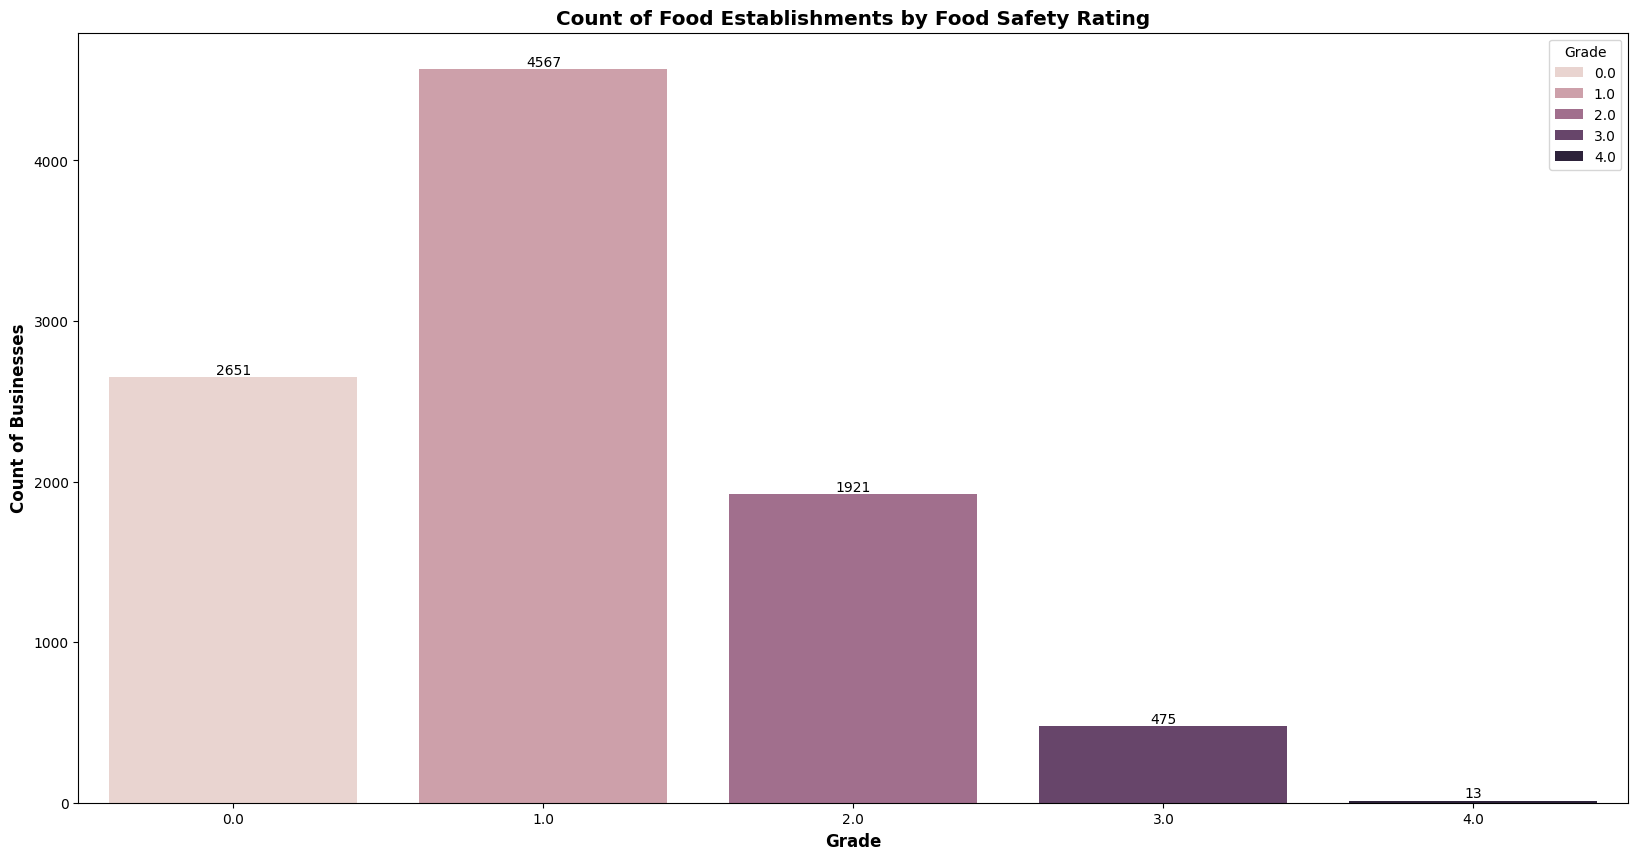

In [44]:
# create bar plot to show distribution
fig, ax = plt.subplots(figsize=(20, 10))

rating_barplot = sns.barplot(
    rating_counts, 
    x = 'Grade', 
    y = 'Count of Businesses', 
    hue = 'Grade'
)

plt.title('Count of Food Establishments by Food Safety Rating', fontsize = 'x-large', weight = 'bold')
plt.xlabel('Grade', fontsize = 'large', weight = 'bold')
plt.ylabel('Count of Businesses', fontsize = 'large', weight = 'bold')
plt.legend(title = 'Grade')

# add bar labels -- need to do this in a for loop because seaborn creates multiple containers based on hue
for bars in ax.containers:
    ax.bar_label(bars)

rating_barplot

#### Insight
Most restaurants tend to have a grade of 1 (meaning Excellent). 

There are a fair amount of establishments with no grade. Are these new restaurants? 

Another question to look into is how this distribution changes by type of establishment (e.g. cafe vs. restaurant vs. grocery store). 

In [45]:
# look at restaurants with no grade
has_no_grade = (inspections['Grade'] == 0.0)
inspections_no_grade = inspections[has_no_grade]
inspections_no_grade.head(10)

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date
30,100Th Ave Cakes,2023-02-10,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0089941,DAEKWVMS4,NaN,0.0,2023-02-10
31,100Th Ave Cakes,2022-06-03,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Complete,False,NaN,NaN,0,PR0089941,DANKUP6XO,NaN,0.0,2023-02-10
32,100Th Ave Cakes,2022-04-29,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Complete,False,NaN,NaN,0,PR0089941,DAEIAN0EI,NaN,0.0,2023-02-10
33,100Th Ave Cakes,2021-12-09,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0089941,DAY0JNLHM,NaN,0.0,2023-02-10
360,1St Union Store,2023-03-02,Grocery Store-no seating - Risk Category I,7729 RAINIER AVE S,Seattle,98118,0.0,Satisfactory,False,NaN,NaN,0,PR0078086,DAC5IWLLO,NaN,0.0,2023-03-02
361,1St Union Store,2022-09-08,Grocery Store-no seating - Risk Category I,7729 RAINIER AVE S,Seattle,98118,0.0,Satisfactory,False,NaN,NaN,0,PR0078086,DAQHGEHRN,NaN,0.0,2023-03-02
362,1St Union Store,2021-11-04,Grocery Store-no seating - Risk Category I,7729 RAINIER AVE S,Seattle,98118,5.0,Satisfactory,False,BLUE,2900 - Adequate equipment for temperature control,5,PR0078086,DA25R0EQF,IVGTXHIZ7,0.0,2023-03-02
424,206 Mini Mart Llc,2023-06-28,Grocery Store-no seating - Risk Category I,8738 RAINIER AVE S,Seattle,98118,3.0,Satisfactory,False,BLUE,"3600 - Proper eating, tasting, drinking, or to...",3,PR0076125,DANEJZH3X,IVJR8WFFS,0.0,2023-06-28
425,206 Mini Mart Llc,2022-08-15,Grocery Store-no seating - Risk Category I,8738 RAINIER AVE S,Seattle,98118,5.0,Satisfactory,False,BLUE,3300 - Potential food contamination prevented ...,5,PR0076125,DADJVZTSL,IVW5QC00B,0.0,2023-06-28
545,24/7 Convenience Store,2023-03-27,Grocery Store-no seating - Risk Category I,11851 GLENDALE WAY S,Seattle,98168,0.0,Satisfactory,False,NaN,NaN,0,PR0082552,DANMB07IQ,NaN,0.0,2023-03-27


In [46]:
# count # of Inspections by Establishment (with no grade)
inspection_counts = inspections_no_grade.groupby(['Name', 'Address']).agg(
    {'Inspection Date':'nunique'}
)
inspection_counts.columns = ['Count of Inspection Dates']
inspection_counts = inspection_counts.reset_index()
inspection_counts = inspection_counts.sort_values('Count of Inspection Dates',ascending = False)
inspection_counts.head(20)

,Name,Address,Count of Inspection Dates
2402,T-Mobile Park,151 S ROYAL BROUGHAM WAY,125
812,El Camion,11728 AURORA AVE N,99
967,Fred Meyer #608,915 NW 45TH ST,82
2109,Safeway Inc #1508,3820 RAINIER AVE S,77
15,99 Ranch Market,18230 E VALLEY HWY,77
971,Fred Meyer Inc #028,14300 1ST AVE S,77
1949,Qfc Inc #847,1401 BROADWAY,75
1938,Qfc #866,11100 ROOSEVELT WAY NE,74
972,Fred Meyer Inc #031,17801 108TH AVE SE,72
973,Fred Meyer Inc #111,33702 21ST AVE SW,72


#### Insight
It looks like most of the establishments that do not have a grade but have a lot of inspections are grocery stores, schools, venues, and other types of businesses where food is not the main source of revenue. It looks like the main determinent might be the risk category (where the column is called Description). Perhaps these establishments are inspected but not given a grade because it doesn't necessarily make sense with the goods they are selling to customers. 

What are all the risk categories? Maybe we want to filter based on this criteria?

In [47]:
# count of establishments by risk category
risk_cat_count = inspections_no_grade.groupby('Description').agg(
    {'Name':'nunique'})
risk_cat_count.columns = ['Count of Establishments']
risk_cat_count = risk_cat_count.reset_index()
risk_cat_count = risk_cat_count.sort_values('Count of Establishments', ascending = False)
risk_cat_count

,Description,Count of Establishments
7,Grocery Store-no seating - Risk Category I,751
17,School Lunch Program - Risk II,461
13,Mobile Food Unit - Risk Category III,401
10,Meat/Sea Food - Risk Category III,287
6,Caterer - Risk Category III,259
1,Bakery-no seating - Risk Category II,203
16,Non-Profit Institution - Risk Category III,197
8,Grocery Store-no seating - Risk Category II,139
9,Limited Food Services - no permanent plumbing,100
11,Mobile Food Unit - Risk Category I,70


#### Insight
Next I think we need to look at the crossover between # of inspections (i.e. do they have less than 4 inspections) and risk category.

In [48]:
# merge count of inspections column into inspections_no_grade df
inspections_no_grade = pd.merge(left = inspections_no_grade,
                               right = inspection_counts,
                               left_on = ['Name', 'Address'],
                               right_on = ['Name', 'Address'],
                               how = 'left')

inspections_no_grade.head(10)

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date,Count of Inspection Dates
0,100Th Ave Cakes,2023-02-10,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0089941,DAEKWVMS4,NaN,0.0,2023-02-10,4
1,100Th Ave Cakes,2022-06-03,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Complete,False,NaN,NaN,0,PR0089941,DANKUP6XO,NaN,0.0,2023-02-10,4
2,100Th Ave Cakes,2022-04-29,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Complete,False,NaN,NaN,0,PR0089941,DAEIAN0EI,NaN,0.0,2023-02-10,4
3,100Th Ave Cakes,2021-12-09,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0089941,DAY0JNLHM,NaN,0.0,2023-02-10,4
4,1St Union Store,2023-03-02,Grocery Store-no seating - Risk Category I,7729 RAINIER AVE S,Seattle,98118,0.0,Satisfactory,False,NaN,NaN,0,PR0078086,DAC5IWLLO,NaN,0.0,2023-03-02,3
5,1St Union Store,2022-09-08,Grocery Store-no seating - Risk Category I,7729 RAINIER AVE S,Seattle,98118,0.0,Satisfactory,False,NaN,NaN,0,PR0078086,DAQHGEHRN,NaN,0.0,2023-03-02,3
6,1St Union Store,2021-11-04,Grocery Store-no seating - Risk Category I,7729 RAINIER AVE S,Seattle,98118,5.0,Satisfactory,False,BLUE,2900 - Adequate equipment for temperature control,5,PR0078086,DA25R0EQF,IVGTXHIZ7,0.0,2023-03-02,3
7,206 Mini Mart Llc,2023-06-28,Grocery Store-no seating - Risk Category I,8738 RAINIER AVE S,Seattle,98118,3.0,Satisfactory,False,BLUE,"3600 - Proper eating, tasting, drinking, or to...",3,PR0076125,DANEJZH3X,IVJR8WFFS,0.0,2023-06-28,2
8,206 Mini Mart Llc,2022-08-15,Grocery Store-no seating - Risk Category I,8738 RAINIER AVE S,Seattle,98118,5.0,Satisfactory,False,BLUE,3300 - Potential food contamination prevented ...,5,PR0076125,DADJVZTSL,IVW5QC00B,0.0,2023-06-28,2
9,24/7 Convenience Store,2023-03-27,Grocery Store-no seating - Risk Category I,11851 GLENDALE WAY S,Seattle,98168,0.0,Satisfactory,False,NaN,NaN,0,PR0082552,DANMB07IQ,NaN,0.0,2023-03-27,5


In [49]:
# filter dataset to greater than or equal to 4 inspections
gte4_inspec = (inspections_no_grade['Count of Inspection Dates'] >= 4)
inspections_no_grade_gt4_inspec = inspections_no_grade[gte4_inspec]
inspections_no_grade_gt4_inspec

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date,Count of Inspection Dates
0,100Th Ave Cakes,2023-02-10,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0089941,DAEKWVMS4,NaN,0.0,2023-02-10,4
1,100Th Ave Cakes,2022-06-03,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Complete,False,NaN,NaN,0,PR0089941,DANKUP6XO,NaN,0.0,2023-02-10,4
2,100Th Ave Cakes,2022-04-29,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Complete,False,NaN,NaN,0,PR0089941,DAEIAN0EI,NaN,0.0,2023-02-10,4
3,100Th Ave Cakes,2021-12-09,Bakery-no seating - Risk Category II,15364 NE 96TH PL,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0089941,DAY0JNLHM,NaN,0.0,2023-02-10,4
9,24/7 Convenience Store,2023-03-27,Grocery Store-no seating - Risk Category I,11851 GLENDALE WAY S,Seattle,98168,0.0,Satisfactory,False,NaN,NaN,0,PR0082552,DANMB07IQ,NaN,0.0,2023-03-27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62817,Zip Market,2015-05-03,Grocery Store-no seating - Risk Category I,10645 16TH AVE SW,Seattle,98146,0.0,Satisfactory,False,NaN,NaN,0,PR0011851,DAWDJRCZ8,NaN,0.0,2023-02-27,13
62818,Zip Market,2014-02-27,Grocery Store-no seating - Risk Category I,10645 16TH AVE SW,Seattle,98146,10.0,Unsatisfactory,False,RED,"1000 - Food in good condition, safe and unadul...",10,PR0011851,DAC50OZST,IVWOGOQKL,0.0,2023-02-27,13
62819,Zip Market,2013-03-06,Grocery Store-no seating - Risk Category I,10645 16TH AVE SW,Seattle,98146,0.0,Satisfactory,False,NaN,NaN,0,PR0011851,DALJKO3CB,NaN,0.0,2023-02-27,13
62820,Zip Market,2012-01-17,Grocery Store-no seating - Risk Category I,10645 16TH AVE SW,Seattle,98146,0.0,Satisfactory,False,NaN,NaN,0,PR0011851,DA2298216,NaN,0.0,2023-02-27,13


In [50]:
# count of establishments by risk category now that we have filtered to greater than or equal to 4 inspections
risk_cat_count = inspections_no_grade_gt4_inspec.groupby('Description').agg(
    {'Name':'nunique'})
risk_cat_count.columns = ['Count of Establishments']
risk_cat_count = risk_cat_count.reset_index()
risk_cat_count = risk_cat_count.sort_values('Count of Establishments', ascending = False)
risk_cat_count

,Description,Count of Establishments
7,Grocery Store-no seating - Risk Category I,561
17,School Lunch Program - Risk II,447
10,Meat/Sea Food - Risk Category III,257
13,Mobile Food Unit - Risk Category III,220
16,Non-Profit Institution - Risk Category III,185
1,Bakery-no seating - Risk Category II,165
6,Caterer - Risk Category III,115
8,Grocery Store-no seating - Risk Category II,114
9,Limited Food Services - no permanent plumbing,74
14,Non-Profit Institution - Risk Category I,42


#### Insight
The majority of these establishments seem to be places either without seating or who's primary purpose is not selling food (e.g. a school). I am curious about the establishments with seating. Let's explore a few of those.

In [51]:
estab_w_seating = (inspections_no_grade_gt4_inspec['Description'] == 'Seating 51-150 - Risk Category III')
estab_w_seating_df = inspections_no_grade_gt4_inspec[estab_w_seating]
estab_w_seating_df.head(100)

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date,Count of Inspection Dates
23112,Just Poke @ Ms 98,2023-05-04,Seating 51-150 - Risk Category III,15255 NE 40TH ST,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0077840,DAS5TGQVZ,NaN,0.0,2023-05-04,21
23113,Just Poke @ Ms 98,2022-11-14,Seating 51-150 - Risk Category III,15255 NE 40TH ST,Redmond,98052,0.0,Satisfactory,False,NaN,NaN,0,PR0077840,DAXJLHSHQ,NaN,0.0,2023-05-04,21
23114,Just Poke @ Ms 98,2019-05-14,Seating 51-150 - Risk Category III,15255 NE 40TH ST,Redmond,98052,0.0,Complete,False,NaN,NaN,0,PR0077840,DA2864478,NaN,0.0,2023-05-04,21
23115,Just Poke @ Ms 98,2019-03-21,Seating 51-150 - Risk Category III,15255 NE 40TH ST,Redmond,98052,5.0,Satisfactory,False,BLUE,4000 - Food and non-food surfaces properly use...,5,PR0077840,DA0CJQQGX,IVUPXZRRV,0.0,2023-05-04,21
23116,Just Poke @ Ms 98,2018-01-17,Seating 51-150 - Risk Category III,15255 NE 40TH ST,Redmond,98052,25.0,Unsatisfactory,False,RED,1600 - Proper cooling procedure,25,PR0077840,DAIF4PTWT,IVGRHXQ1W,0.0,2023-05-04,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24375,King Wha Restaurant,2006-09-01,Seating 51-150 - Risk Category III,605 SW 152ND ST,Seattle,98166,19.0,Unsatisfactory,False,BLUE,"Physical facilities properly installed,...",2,PR0004647,DA1578101,IV0562184,0.0,2022-06-06,41
24376,King Wha Restaurant,2006-09-01,Seating 51-150 - Risk Category III,605 SW 152ND ST,Seattle,98166,19.0,Unsatisfactory,False,BLUE,Adequate ventilation; lighting; designated are...,2,PR0004647,DA1578101,IV0562185,0.0,2022-06-06,41
24377,King Wha Restaurant,2006-09-01,Seating 51-150 - Risk Category III,605 SW 152ND ST,Seattle,98166,19.0,Unsatisfactory,False,RED,"Toxic substances properly identified,...",10,PR0004647,DA1578101,IV0562183,0.0,2022-06-06,41
24378,King Wha Restaurant,2006-09-01,Seating 51-150 - Risk Category III,605 SW 152ND ST,Seattle,98166,19.0,Unsatisfactory,False,RED,Proper handling of pooled eggs,5,PR0004647,DA1578101,IV0562182,0.0,2022-06-06,41


In [52]:
estab_w_seating = (inspections_no_grade_gt4_inspec['Description'] == 'Seating 0-12 - Risk Category III')
estab_w_seating_df = inspections_no_grade_gt4_inspec[estab_w_seating]
estab_w_seating_df.head(100)

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date,Count of Inspection Dates
23094,Jumpin Jambalaya Llc,2023-09-22,Seating 0-12 - Risk Category III,4116 RAINIER AVE S,Seattle,98118,0.0,Complete,False,NaN,NaN,0,PR0089305,DAMCELLFB,NaN,0.0,2023-09-22,5
23095,Jumpin Jambalaya Llc,2022-08-17,Seating 0-12 - Risk Category III,4116 RAINIER AVE S,Seattle,98118,0.0,Satisfactory,False,NaN,NaN,0,PR0089305,DACVCD7AS,NaN,0.0,2023-09-22,5
23096,Jumpin Jambalaya Llc,2021-11-05,Seating 0-12 - Risk Category III,4116 RAINIER AVE S,Seattle,98118,5.0,Satisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, pr...",5,PR0089305,DAH7LCLIE,IVMRUSG20,0.0,2023-09-22,5
23097,Jumpin Jambalaya Llc,2021-07-26,Seating 0-12 - Risk Category III,4116 RAINIER AVE S,Seattle,98118,0.0,Unsatisfactory,False,NaN,NaN,0,PR0089305,DAOTELMZW,NaN,0.0,2023-09-22,5
23098,Jumpin Jambalaya Llc,2020-12-28,Seating 0-12 - Risk Category III,4116 RAINIER AVE S,Seattle,98118,5.0,Satisfactory,False,BLUE,4100 - Warewashing facilities properly install...,5,PR0089305,DAXAKKCKF,IVGG0MVEM,0.0,2023-09-22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55929,Teto'S Cantina,2006-09-11,Seating 0-12 - Risk Category III,211 NE 45TH ST,Seattle,98105,25.0,Unsatisfactory,False,RED,Proper cold holding temperatures (greater than...,10,PR0002110,DA1580878,IV0562798,0.0,2023-03-16,31
55930,Teto'S Cantina,2006-03-31,Seating 0-12 - Risk Category III,211 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,BLUE,Adequate equipment for temperature control,5,PR0002110,DA1510621,IV0545020,0.0,2023-03-16,31
55931,Teto'S Cantina,2006-03-31,Seating 0-12 - Risk Category III,211 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,BLUE,Non-food contact surfaces maintained and clean,3,PR0002110,DA1510621,IV0545021,0.0,2023-03-16,31
55932,Teto'S Cantina,2006-03-31,Seating 0-12 - Risk Category III,211 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,BLUE,"Physical facilities properly installed,...",2,PR0002110,DA1510621,IV0545022,0.0,2023-03-16,31


#### Insight
Taking a look at this list of restaurants with seating that have no grade and greater than 4 inspections, it appears that some of the reasons include:
- A restaurant inside of an office building (e.g. Just Poke in Microsoft's Redmond Campus, a food stand inside a sports stadiun)
- The restaurant has since closed
- The establishment is a small boutique grocery store (e.g. a spice store)
- There is a duplicate name of a restaurant (might be a second location). We will fix our merge and inspection count data above to include address to solve for this.

In conclusion, I think we can filter our data to exclude establishments with greater than 4 inspections and with no grade (e.g. grocery stores, schools, etc). We still want to know which establishments don't have a grade because they are new. We will create a new dataset with these rows.

In [53]:
# add count of inspections to original df inspections

# count # of Inspections by Establishment (with no grade)
inspection_counts = inspections.groupby(['Name', 'Address']).agg(
    {'Inspection Date':'nunique'}
)
inspection_counts.columns = ['Count of Inspection Dates']
inspection_counts = inspection_counts.reset_index()
inspection_counts = inspection_counts.sort_values('Count of Inspection Dates',ascending = False)
#inspection_counts.head(20)

# merge this table into original df inspections
inspections = pd.merge(left = inspections,
                               right = inspection_counts,
                               left_on = ['Name', 'Address'],
                               right_on = ['Name', 'Address'],
                               how = 'left')

inspections.head(10)

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date,Count of Inspection Dates
0,#807 Tutta Bella,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,PR0089260,DAJ5DTHLV,IVBTPZO0B,1.0,2023-03-02,4
1,#807 Tutta Bella,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAJ5DTHLV,IV5GOME67,1.0,2023-03-02,4
2,#807 Tutta Bella,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0,2023-03-02,4
3,#807 Tutta Bella,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0,2023-03-02,4
4,#807 Tutta Bella,2022-01-13,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0,2023-03-02,4
5,#807 Tutta Bella,2021-01-06,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,DAUHM2FT8,NaN,1.0,2023-03-02,4
6,+Mas Cafe,2023-06-22,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,0.0,Satisfactory,False,NaN,NaN,0,PR0046367,DA4B5GZ0V,NaN,2.0,2023-06-22,6
7,+Mas Cafe,2023-03-01,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,30.0,Unsatisfactory,False,BLUE,"4400 - Plumbing properly sized, installed,...",5,PR0046367,DA3195719,IV7033451,2.0,2023-06-22,6
8,+Mas Cafe,2023-03-01,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,30.0,Unsatisfactory,False,RED,1710 - Proper hot holding temperatures (less t...,25,PR0046367,DA3195719,IV7033411,2.0,2023-06-22,6
9,+Mas Cafe,2022-07-13,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,0.0,Satisfactory,False,NaN,NaN,0,PR0046367,DATSWIPUS,NaN,2.0,2023-06-22,6


In [54]:
# create new df that filters out a grade of zero 
# gt_4_inspec = (inspections['Count of Inspection Dates'] >= 4)
is_grade_zero = (inspections['Grade'] == 0.0)
#combined = gt_4_inspec & is_grade_zero

#inspections_filtered = inspections[~combined]
inspections_has_grade = inspections[~is_grade_zero]

inspections_has_grade.head(10)

,Name,Inspection Date,Description,Address,City,Zip Code,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,Most Recent Date,Count of Inspection Dates
0,#807 Tutta Bella,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,PR0089260,DAJ5DTHLV,IVBTPZO0B,1.0,2023-03-02,4
1,#807 Tutta Bella,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAJ5DTHLV,IV5GOME67,1.0,2023-03-02,4
2,#807 Tutta Bella,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0,2023-03-02,4
3,#807 Tutta Bella,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0,2023-03-02,4
4,#807 Tutta Bella,2022-01-13,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0,2023-03-02,4
5,#807 Tutta Bella,2021-01-06,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,DAUHM2FT8,NaN,1.0,2023-03-02,4
6,+Mas Cafe,2023-06-22,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,0.0,Satisfactory,False,NaN,NaN,0,PR0046367,DA4B5GZ0V,NaN,2.0,2023-06-22,6
7,+Mas Cafe,2023-03-01,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,30.0,Unsatisfactory,False,BLUE,"4400 - Plumbing properly sized, installed,...",5,PR0046367,DA3195719,IV7033451,2.0,2023-06-22,6
8,+Mas Cafe,2023-03-01,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,30.0,Unsatisfactory,False,RED,1710 - Proper hot holding temperatures (less t...,25,PR0046367,DA3195719,IV7033411,2.0,2023-06-22,6
9,+Mas Cafe,2022-07-13,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,0.0,Satisfactory,False,NaN,NaN,0,PR0046367,DATSWIPUS,NaN,2.0,2023-06-22,6


<Axes: title={'center': 'Count of Food Establishments by Food Safety Rating'}, xlabel='Grade', ylabel='Count of Businesses'>

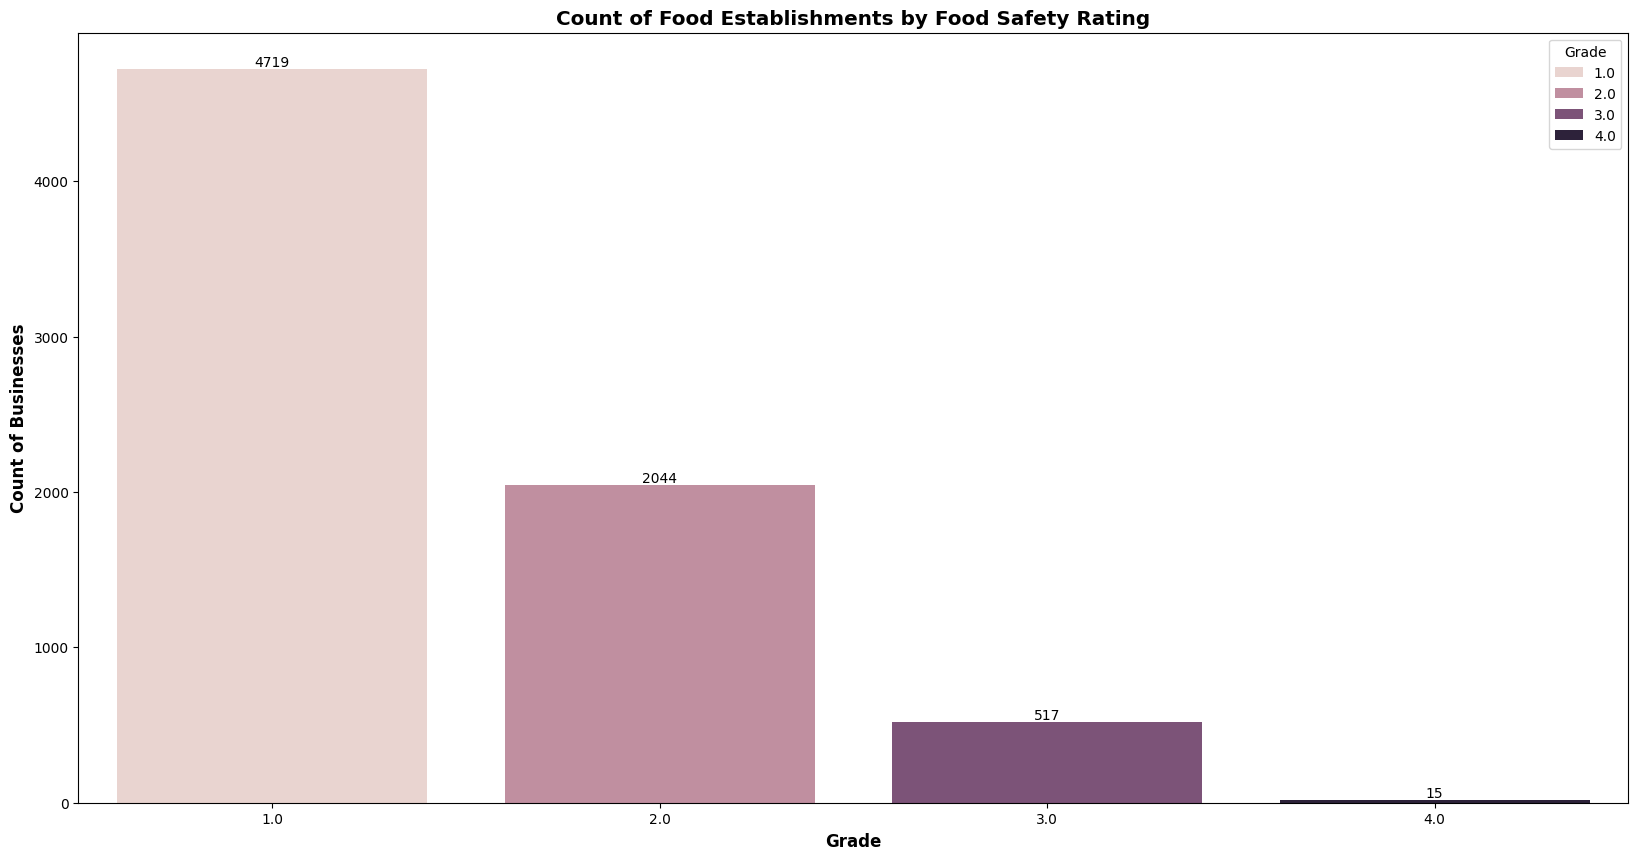

In [55]:
# Count establishments by grade
rating_counts = inspections_has_grade.groupby('Grade').agg(
    {'Name':['nunique','count']}
)
rating_counts.columns = ['Count of Businesses', 'Count of Rows']
rating_counts = rating_counts.reset_index()
rating_counts

# create bar plot to show distribution now that we have filtered the data
fig, ax = plt.subplots(figsize=(20, 10))

rating_barplot = sns.barplot(
    rating_counts, 
    x = 'Grade', 
    y = 'Count of Businesses', 
    hue = 'Grade'
)

plt.title('Count of Food Establishments by Food Safety Rating', fontsize = 'x-large', weight = 'bold')
plt.xlabel('Grade', fontsize = 'large', weight = 'bold')
plt.ylabel('Count of Businesses', fontsize = 'large', weight = 'bold')
plt.legend(title = 'Grade')

# add bar labels -- need to do this in a for loop because seaborn creates multiple containers based on hue
for bars in ax.containers:
    ax.bar_label(bars)

rating_barplot

In [57]:
# count of establishments by risk category 
risk_cat_count = inspections_has_grade.groupby('Description').agg(
    {'Name':'nunique'})
risk_cat_count.columns = ['Count of Establishments']
risk_cat_count = risk_cat_count.reset_index()
risk_cat_count = risk_cat_count.sort_values('Count of Establishments', ascending = False)
risk_cat_count

,Description,Count of Establishments
5,Seating 13-50 - Risk Category III,2219
11,Seating 51-150 - Risk Category III,1823
2,Seating 0-12 - Risk Category III,1574
4,Seating 13-50 - Risk Category II,427
1,Seating 0-12 - Risk Category II,413
8,Seating 151-250 - Risk Category III,317
0,Seating 0-12 - Risk Category I,265
14,Seating > 250 - Risk Category III,210
3,Seating 13-50 - Risk Category I,150
10,Seating 51-150 - Risk Category II,74


#### Insight
When we remove 0 grades from the data, we are left with establishments with seating as we expected. Now we can move forward analyzing this restaurant specific data.

# TO DO
Look at percentage distribution of grades by risk category and city. 

The below methods aren't really working super well, so might need to rethink how we are solving for this.


In [66]:
# Count establishments by grade
rating_counts_description = inspections_has_grade.groupby(['Grade', 'Description']).agg(
    {'Name':'nunique'}
)
rating_counts_description.columns = ['Count of Businesses']
rating_counts_description = rating_counts_description.reset_index()
rating_counts_description.head(20)

,Grade,Description,Count of Businesses
0,1.0,Seating 0-12 - Risk Category I,225
1,1.0,Seating 0-12 - Risk Category II,357
2,1.0,Seating 0-12 - Risk Category III,1044
3,1.0,Seating 13-50 - Risk Category I,137
4,1.0,Seating 13-50 - Risk Category II,373
5,1.0,Seating 13-50 - Risk Category III,1378
6,1.0,Seating 151-250 - Risk Category I,9
7,1.0,Seating 151-250 - Risk Category II,1
8,1.0,Seating 151-250 - Risk Category III,194
9,1.0,Seating 51-150 - Risk Category I,56


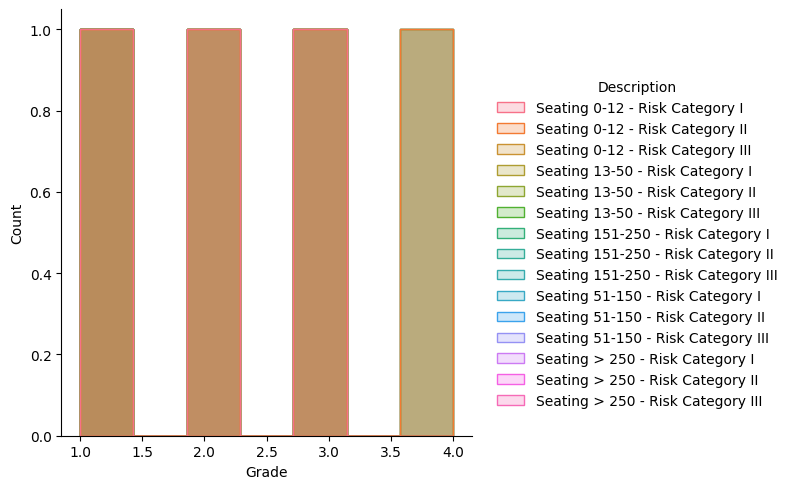

In [68]:
rating_description_plot = sns.displot(rating_counts_description, x="Grade", hue="Description", element = 'step')
rating_description_plot

In [65]:
# Count establishments by grade
rating_counts_city = inspections_has_grade.groupby(['Grade', 'City']).agg(
    {'Name':['nunique','count']}
)
rating_counts_city.columns = ['Count of Businesses', 'Count of Rows']
rating_counts_city = rating_counts_city.reset_index()
rating_counts_city.head(20)

,Grade,City,Count of Businesses,Count of Rows
0,1.0,Aberdeen,1,1
1,1.0,Algona,3,107
2,1.0,Auburn,167,3485
3,1.0,Bellevue,311,7250
4,1.0,Black Diamond,12,112
5,1.0,Bothell,39,1104
6,1.0,Burien,84,1734
7,1.0,Carnation,9,165
8,1.0,Clyde Hill,1,13
9,1.0,Covington,29,578


In [64]:
plot_count = rating_counts_city['City'].nunique() 
plot_count

%matplotlib inline
count = -1
variables = rating_counts_city['City'].unique() 

fig, axs = plt.subplots(plot_count, 1, figsize = (100,500), sharex = False, sharey = False) 

for var in variables:
        count += 1 
        sns.barplot(ax = axs[count], data = rating_counts_city, x = 'Grade', y = 'Count of Businesses')
        plt.title(var)